In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from python_files.fetch_missing_data import fetch_missing_data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from python_files.data import GetData
from python_files.basic_preprocessing import BasicPreprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Check missing data

In [29]:
data = GetData().get_data()['AllDataMerged_updated']
data.head()

,id,budget,genres,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,...,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,5,4000000,Crime|Comedy,tt0113101,en,Miramax Films,United States of America,25-12-1995,4300000,98.0,...,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
1,9,4000000,Drama,tt0425473,de,none,Germany,02-09-2004,4257354,15.0,...,none,0,2,Marc Meyer,0.0,2,Marc Meyer,1,none,Marc Meyer
2,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,Lucasfilm,United States of America,25-05-1977,775398007,121.0,...,Alec Guinness,2,106,George Lucas,2.0,1,Gary Kurtz,2,none,Marcia Lucas
3,12,94000000,Animation|Family,tt0266543,en,Pixar Animation Studios,United States of America,30-05-2003,940335536,100.0,...,Brad Garrett,2,24,Andrew Stanton,2.0,1,Graham Walters,1,Andrew Stanton,David Ian Salter
4,13,55000000,Comedy|Drama|Romance,tt0109830,en,Paramount Pictures,United States of America,06-07-1994,677945399,142.0,...,Sally Field,1,67,Robert Zemeckis,2.0,1,Wendy Finerman,3,Eric Roth,Arthur Schmidt


In [30]:
data.shape

(8939, 35)

In [31]:
data.isnull().sum()

id                                0
budget                            0
genres                          246
imdb_id                         227
original_language                 1
production_companies              0
production_countries              0
release_date                     21
revenue                           0
runtime                          26
spoken_languages                 83
status                            0
title                             0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          7467
actor1_name                       0
actor1_gender                     0
actor2_name                       0
actor2_gender                     0
actor3_name                       0
actor3_gender                     0
actor4_name                       0
actor4_gender                     0
actor5_name                       0
actor5_gender                     0
actor_number                

In [32]:
data.dtypes

id                               int64
budget                           int64
genres                          object
imdb_id                         object
original_language               object
production_companies            object
production_countries            object
release_date                    object
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
production_companies_number      int64
production_countries_number      int64
spoken_languages_number          int64
belongs_to_collection           object
actor1_name                     object
actor1_gender                    int64
actor2_name                     object
actor2_gender                  float64
actor3_name                     object
actor3_gender                    int64
actor4_name                     object
actor4_gender                    int64
actor5_name              

In [33]:
data.nunique()

id                             8939
budget                          917
genres                         1689
imdb_id                        8712
original_language                56
production_companies           2677
production_countries             89
release_date                   5685
revenue                        6333
runtime                         229
spoken_languages                 60
status                            1
title                          8735
production_companies_number      23
production_countries_number      11
spoken_languages_number          10
belongs_to_collection           812
actor1_name                    4117
actor1_gender                     3
actor2_name                    5333
actor2_gender                     3
actor3_name                    5952
actor3_gender                     3
actor4_name                    6248
actor4_gender                     3
actor5_name                    6329
actor5_gender                     3
actor_number                

In [34]:
data['actor1_name'].value_counts()

none                 628
Nicolas Cage          36
Bruce Willis          33
Robert De Niro        33
Johnny Depp           33
                    ... 
Thomas Gibson          1
Iaia Forte             1
Heinrich Ebber         1
Aileen Quinn           1
Mustafa Burmawala      1
Name: actor1_name, Length: 4117, dtype: int64

In [35]:
data['actor1_gender'].value_counts()

2    5419
1    1780
0    1740
Name: actor1_gender, dtype: int64

In [9]:
data.describe()

,id,budget,revenue,runtime,production_companies_number,production_countries_number,spoken_languages_number,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,actor_number,director_gender,director_number,producer_number
count,8939.000000,8.939000e+03,8.939000e+03,8913.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.00000,8939.000000,8939.000000,8939.000000,8939.000000
mean,49161.881530,2.815872e+07,7.817054e+07,103.205767,2.203043,1.236939,1.344781,1.411567,1.232464,1.211097,1.181005,1.12988,18.030652,1.389641,1.046538,1.600626
std,85018.062575,3.670012e+07,1.498542e+08,31.831092,2.101648,0.763347,0.858362,0.794705,0.790194,0.817455,0.852329,0.87864,17.784568,0.881162,0.501133,1.646896
min,5.000000,3.000000e+04,3.003000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,9568.000000,5.000000e+06,6.418310e+06,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,8.000000,0.000000,1.000000,0.000000
50%,17561.000000,1.500000e+07,2.551375e+07,101.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,14.000000,2.000000,1.000000,1.000000
75%,37671.000000,3.500000e+07,8.460386e+07,116.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,21.000000,2.000000,1.000000,2.000000
max,468938.000000,3.800000e+08,2.920357e+09,720.000000,26.000000,12.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.00000,313.000000,2.000000,21.000000,22.000000


# Preprocessing

In [36]:
df = data.copy()

In [37]:
# Replace NaN by 0
df.runtime.replace(np.NaN, 0, inplace=True)

In [38]:
df.isnull().sum()

id                                0
budget                            0
genres                          246
imdb_id                         227
original_language                 1
production_companies              0
production_countries              0
release_date                     21
revenue                           0
runtime                           0
spoken_languages                 83
status                            0
title                             0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          7467
actor1_name                       0
actor1_gender                     0
actor2_name                       0
actor2_gender                     0
actor3_name                       0
actor3_gender                     0
actor4_name                       0
actor4_gender                     0
actor5_name                       0
actor5_gender                     0
actor_number                

# Top K calcuation

In [39]:
revenue_top_k = np.partition(df['revenue'], -30)[-30:]
revenue_top_k

array([1025491110, 1028570889, 1045713802, 1045713802, 1053929274,
       1065659812, 1091405097, 1066969703, 1108561013, 1084939099,
       1118888979, 2068223624, 1215439994, 1212583865, 1341511219,
       1274219009, 1519557910, 1153304495, 1405035767, 1513528810,
       1845034188, 1118888979, 1123746996, 1518815515, 1256977550,
       2781505847, 1156730962, 1342000000, 1506249360, 2920357254])

In [40]:
np.sort(revenue_top_k)[::-1]

array([2920357254, 2781505847, 2068223624, 1845034188, 1519557910,
       1518815515, 1513528810, 1506249360, 1405035767, 1342000000,
       1341511219, 1274219009, 1256977550, 1215439994, 1212583865,
       1156730962, 1153304495, 1123746996, 1118888979, 1118888979,
       1108561013, 1091405097, 1084939099, 1066969703, 1065659812,
       1053929274, 1045713802, 1045713802, 1028570889, 1025491110])

In [41]:
# define function for top_k calcuation

def top_k(feature, k):
    feature_top_k = np.partition(feature, -k)[-k:]
    return np.sort(feature_top_k)[::-1]

In [42]:
top_k(data['runtime'], 30)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, 720., 552., 552., 371.])

# log feature

In [43]:
# Apply log feature to budget and revnue
df['budget_log'] = np.log(df['budget'])
df['revenue_log'] = np.log(df['revenue'])

In [44]:
df.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number', 'belongs_to_collection', 'actor1_name',
       'actor1_gender', 'actor2_name', 'actor2_gender', 'actor3_name',
       'actor3_gender', 'actor4_name', 'actor4_gender', 'actor5_name',
       'actor5_gender', 'actor_number', 'director_name', 'director_gender',
       'director_number', 'producer_name', 'producer_number', 'screeplay_name',
       'editor_name', 'budget_log', 'revenue_log'],
      dtype='object')

# Scaling analysis

In [45]:
# Define function to Standardization scaling

def Standardization_scaling(data_feature):
    sd_scaler = StandardScaler()
    sd_scaler.fit(data_feature)
    return sd_scaler.transform(data_feature)

In [46]:
# Define function to MinMax scaling

def MinMax_scaling(data_feature):
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(data_feature)
    return mm_scaler.transform(data_feature)

In [47]:
# Define function to Robust scaling

def Robust_scaling(data_feature):
    rb_scaler = RobustScaler()
    rb_scaler.fit(data_feature)
    return rb_scaler.transform(data_feature)

In [73]:
df['budget_log_sd_scal'] = Standardization_scaling(df[['budget_log']])
df['budget_log_mm_scal'] = MinMax_scaling(df[['budget_log']])
df['budget_log_rb_scal'] = Robust_scaling(df[['budget_log']])

In [74]:
df['runtime_sd_scal'] = Standardization_scaling(df[['runtime']])
df['runtime_mm_scal'] = MinMax_scaling(df[['runtime']])
df['runtime_rb_scal'] = Robust_scaling(df[['runtime']])

In [78]:
df['production_companies_number_sd_scal'] = Standardization_scaling(df[['production_companies_number']])
df['production_companies_number_mm_scal'] = MinMax_scaling(df[['production_companies_number']])
df['production_companies_number_rb_scal'] = Robust_scaling(df[['production_companies_number']])

In [81]:
df['production_countries_number_sd_scal'] = Standardization_scaling(df[['production_countries_number']])
df['production_countries_number_mm_scal'] = MinMax_scaling(df[['production_countries_number']])
df['production_countries_number_rb_scal'] = Robust_scaling(df[['production_countries_number']])

In [82]:
df['spoken_languages_number_sd_scal'] = Standardization_scaling(df[['spoken_languages_number']])
df['spoken_languages_number_mm_scal'] = MinMax_scaling(df[['spoken_languages_number']])
df['spoken_languages_number_rb_scal'] = Robust_scaling(df[['spoken_languages_number']])

In [59]:
# Display historgram

def display_histor(feature_1, feature_2):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    sns.histplot(feature_1, bins=40, ax=axs[0])
    sns.histplot(feature_2, bins=40, ax=axs[1])
    return

In [65]:
# Display outliner

def display_boxplot(feature_1, feature_2):
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    sns.boxplot(feature_1, ax=axs[0])
    sns.boxplot(feature_2, ax=axs[1])
    return

## budget

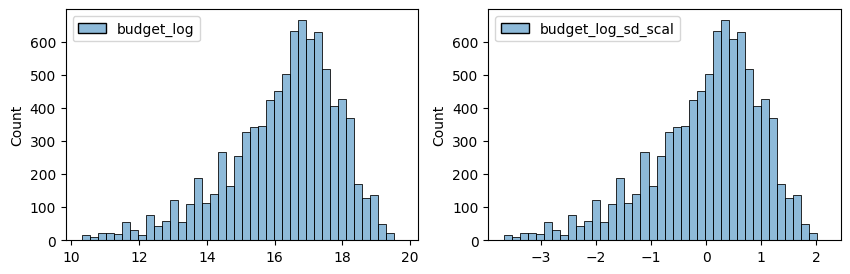

In [68]:
display_histor(df[['budget_log']],df[['budget_log_sd_scal']])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


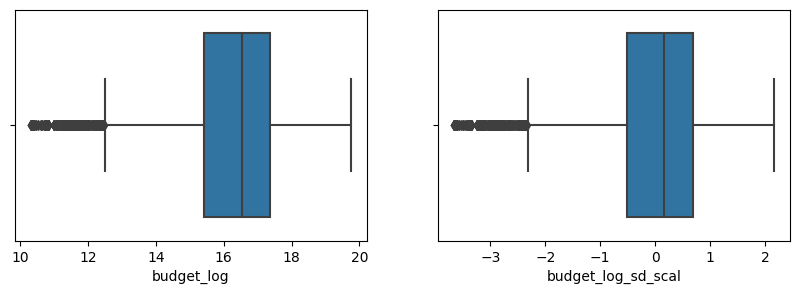

In [72]:
display_boxplot(df['budget_log'], df['budget_log_sd_scal'])

## Runtime

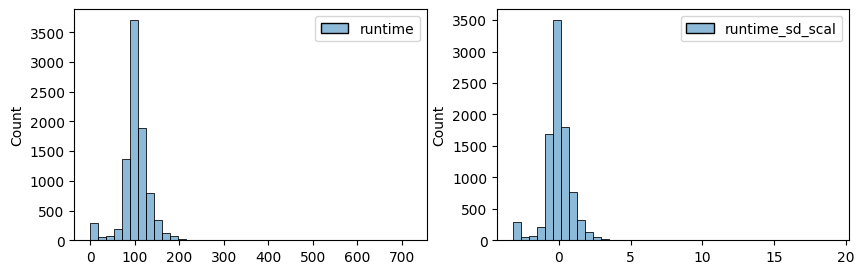

In [75]:
display_histor(df[['runtime']],df[['runtime_sd_scal']])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


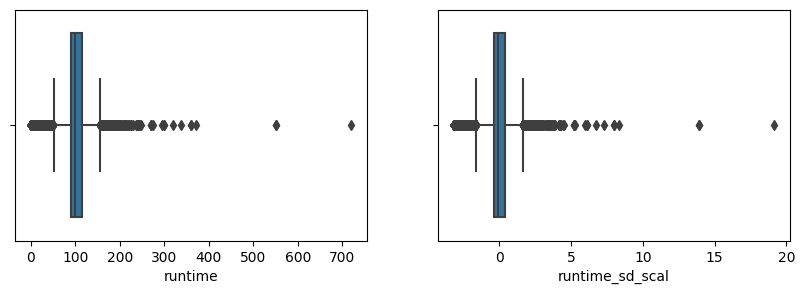

In [76]:
display_boxplot(df['runtime'], df['runtime_sd_scal'])

## Production company numbers

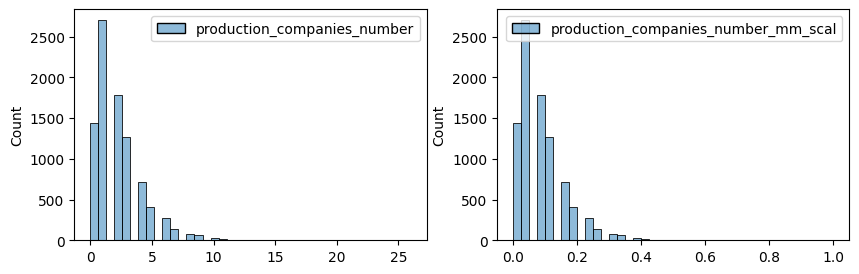

In [88]:
display_histor(df[['production_companies_number']],df[['production_companies_number_mm_scal']])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


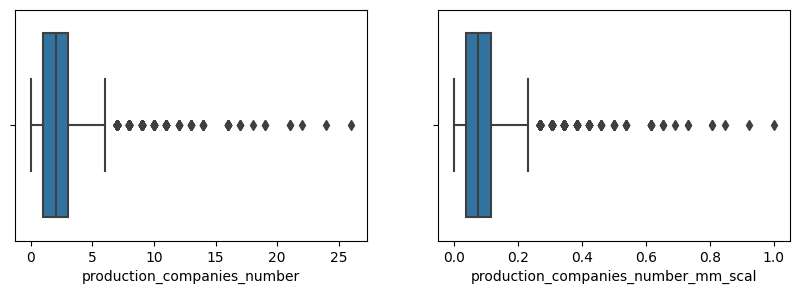

In [80]:
display_boxplot(df['production_companies_number'], df['production_companies_number_mm_scal'])

## Production contries numbers

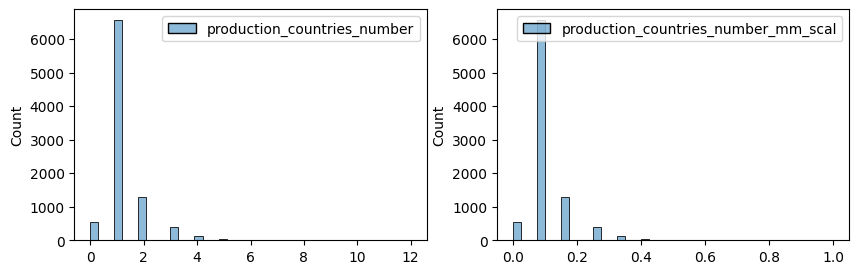

In [83]:
display_histor(df[['production_countries_number']],df[['production_countries_number_mm_scal']])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


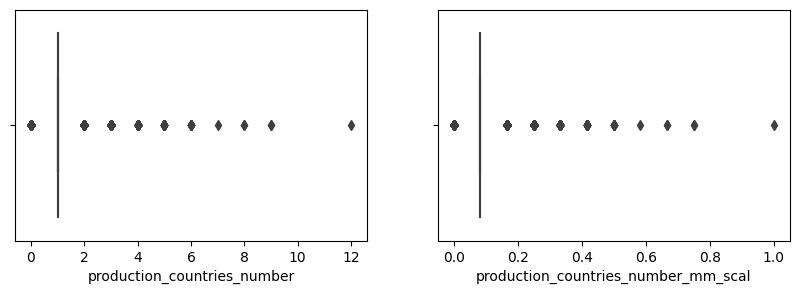

In [84]:
display_boxplot(df['production_countries_number'], df['production_countries_number_mm_scal'])

In [90]:
df[['production_countries_number']]

,production_countries_number
0,1
1,1
2,1
3,1
4,1
...,...
8934,0
8935,2
8936,1
8937,1


## Spoken language numbers

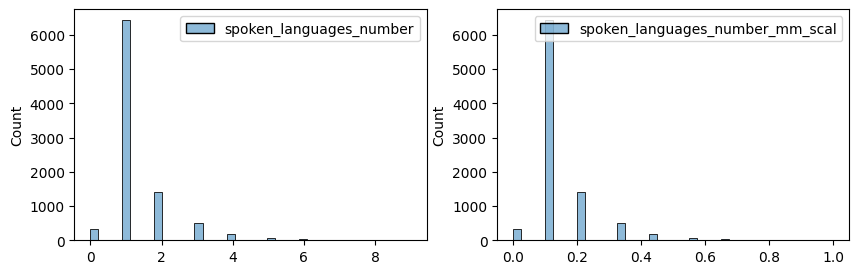

In [85]:
display_histor(df[['spoken_languages_number']],df[['spoken_languages_number_mm_scal']])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


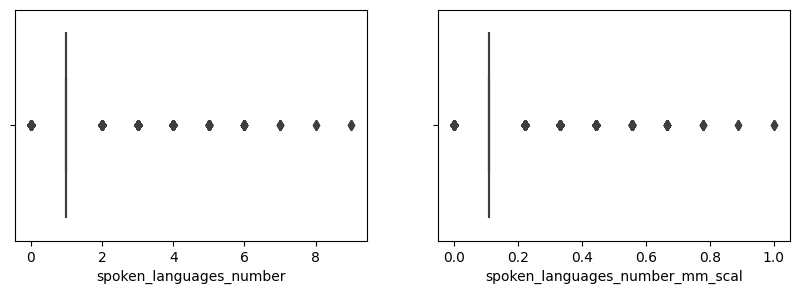

In [86]:
display_boxplot(df['spoken_languages_number'], df['spoken_languages_number_mm_scal'])

In [97]:
df[['spoken_languages_number']]

,spoken_languages_number
0,1
1,1
2,1
3,1
4,1
...,...
8934,0
8935,0
8936,2
8937,1


# pipeline

In [123]:
# Parallelize "num_transformer" 
preprocessor = ColumnTransformer([
('Standardization_scaling', StandardScaler(), ['budget_log', 'runtime']),
('MinMax_scaling', MinMaxScaler(), ['production_companies_number', 'production_countries_number']),
('Robust_scaling', RobustScaler(), ['spoken_languages_number'])],
remainder ='passthrough' )

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Standardization_scaling', StandardScaler(),
                                 ['budget_log', 'runtime']),
                                ('MinMax_scaling', MinMaxScaler(),
                                 ['production_companies_number',
                                  'production_countries_number']),
                                ('Robust_scaling', RobustScaler(),
                                 ['spoken_languages_number'])])

In [124]:
df_transformed = preprocessor.fit_transform(df)

In [125]:
pd.DataFrame(df_transformed)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.650812,-0.152039,0.076923,0.083333,0.0,5,4000000,Crime|Comedy,tt0113101,en,...,-0.076923,-0.096617,0.076923,0.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
1,-0.650812,-2.724463,0.0,0.083333,0.0,9,4000000,Drama,tt0425473,de,...,-3.269231,-1.048304,0.0,-1.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
2,-0.026989,0.560801,0.076923,0.083333,0.0,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,...,0.807692,-0.096617,0.076923,0.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
3,1.296011,-0.090053,0.038462,0.083333,0.0,12,94000000,Animation|Family,tt0266543,en,...,0.0,-0.57246,0.038462,-0.5,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
4,0.9655,1.211656,0.038462,0.083333,0.0,13,55000000,Comedy|Drama|Romance,tt0109830,en,...,1.615385,-0.57246,0.038462,-0.5,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,-1.255658,-0.090053,0.0,0.0,-1.0,464068,1500000,NaN,tt5198844,en,...,0.0,-1.048304,0.0,-1.0,-1.620506,0.0,-1.0,-1.566771,0.0,-1.0
8935,0.400453,-3.189359,0.115385,0.166667,-1.0,467210,22000000,Action|Animation|Adventure|Family|Romance,NaN,es,...,-3.846154,0.379227,0.115385,0.5,0.999681,0.166667,1.0,-1.566771,0.0,-1.0
8936,-0.215709,1.86251,0.0,0.083333,1.0,467453,8100000,Comedy|Action|Drama,tt5883300,en,...,2.423077,-1.048304,0.0,-1.0,-0.310413,0.083333,0.0,0.763379,0.222222,1.0
8937,-1.643301,-3.189359,0.0,0.083333,0.0,468654,800000,NaN,NaN,ar,...,-3.846154,-1.048304,0.0,-1.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0


In [126]:
pd.DataFrame(
df_transformed,
columns=preprocessor.get_feature_names_out()
).head()

,Standardization_scaling__budget_log,Standardization_scaling__runtime,MinMax_scaling__production_companies_number,MinMax_scaling__production_countries_number,Robust_scaling__spoken_languages_number,remainder__id,remainder__budget,remainder__genres,remainder__imdb_id,remainder__original_language,...,remainder__runtime_rb_scal,remainder__production_companies_number_sd_scal,remainder__production_companies_number_mm_scal,remainder__production_companies_number_rb_scal,remainder__production_countries_number_sd_scal,remainder__production_countries_number_mm_scal,remainder__production_countries_number_rb_scal,remainder__spoken_languages_number_sd_scal,remainder__spoken_languages_number_mm_scal,remainder__spoken_languages_number_rb_scal
0,-0.650812,-0.152039,0.076923,0.083333,0.0,5,4000000,Crime|Comedy,tt0113101,en,...,-0.076923,-0.096617,0.076923,0.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
1,-0.650812,-2.724463,0.0,0.083333,0.0,9,4000000,Drama,tt0425473,de,...,-3.269231,-1.048304,0.0,-1.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
2,-0.026989,0.560801,0.076923,0.083333,0.0,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,...,0.807692,-0.096617,0.076923,0.0,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
3,1.296011,-0.090053,0.038462,0.083333,0.0,12,94000000,Animation|Family,tt0266543,en,...,0.0,-0.57246,0.038462,-0.5,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
4,0.9655,1.211656,0.038462,0.083333,0.0,13,55000000,Comedy|Drama|Romance,tt0109830,en,...,1.615385,-0.57246,0.038462,-0.5,-0.310413,0.083333,0.0,-0.401696,0.111111,0.0
